In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

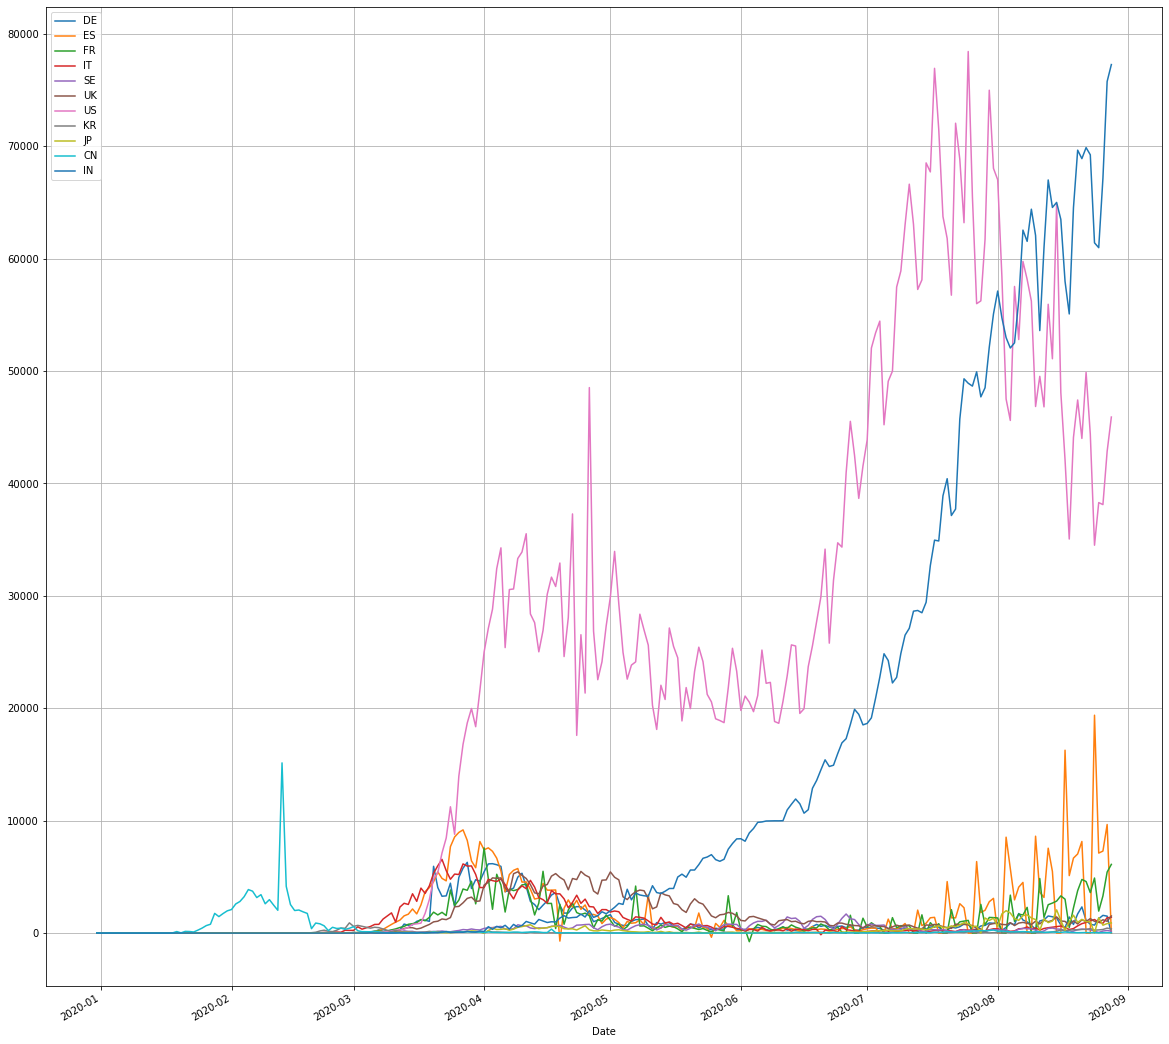

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

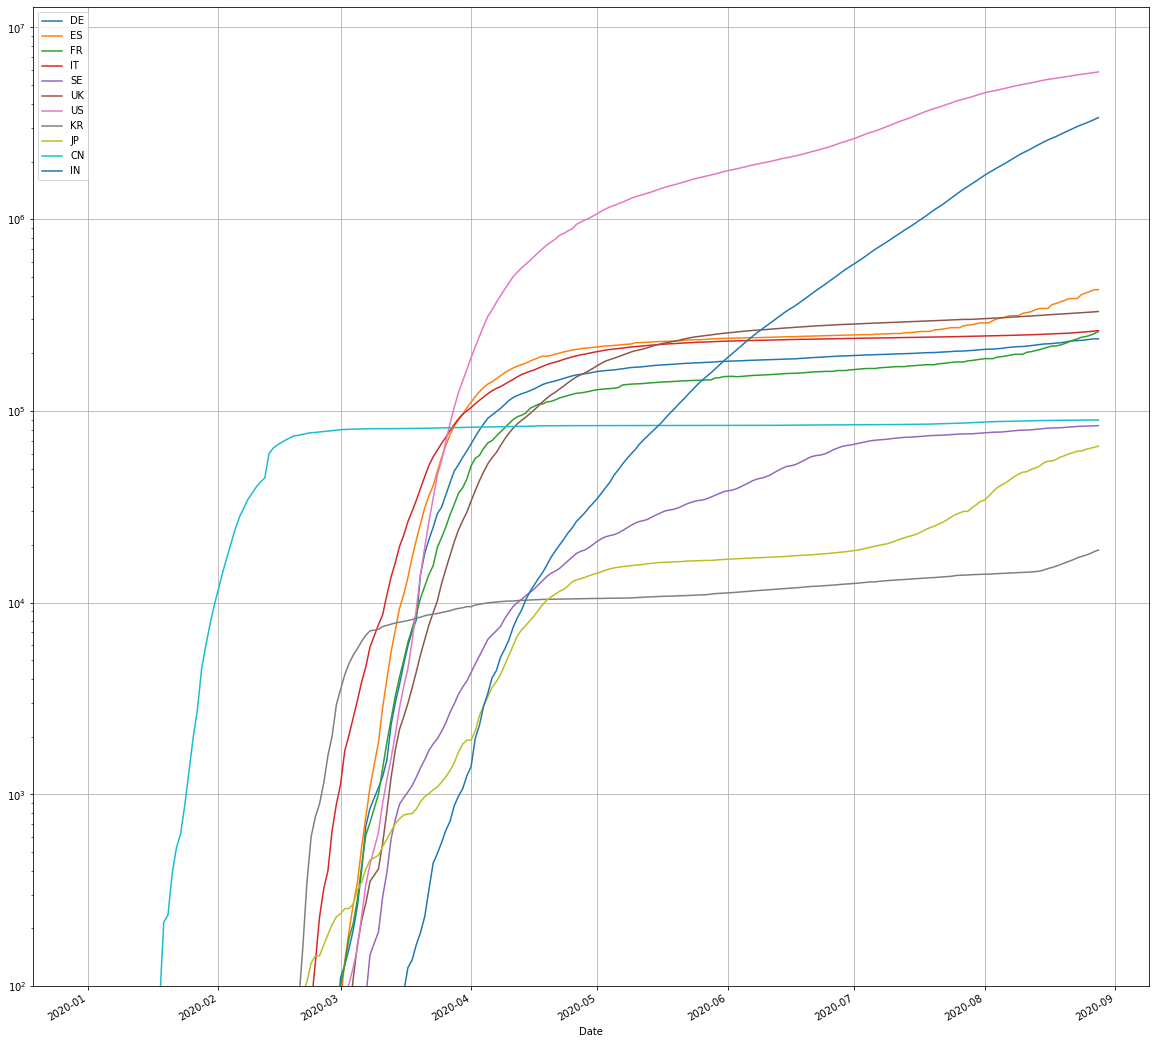

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

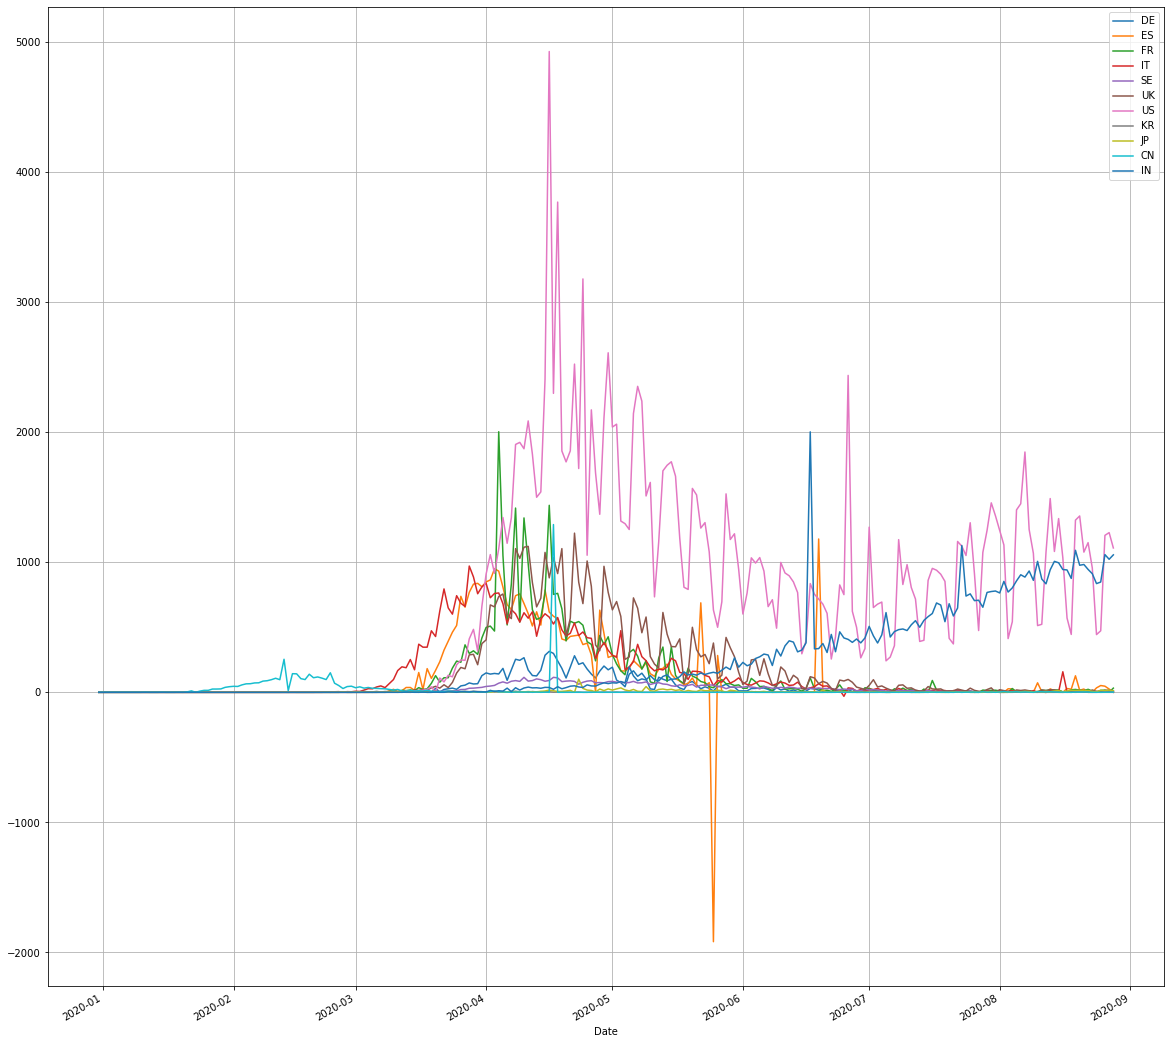

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

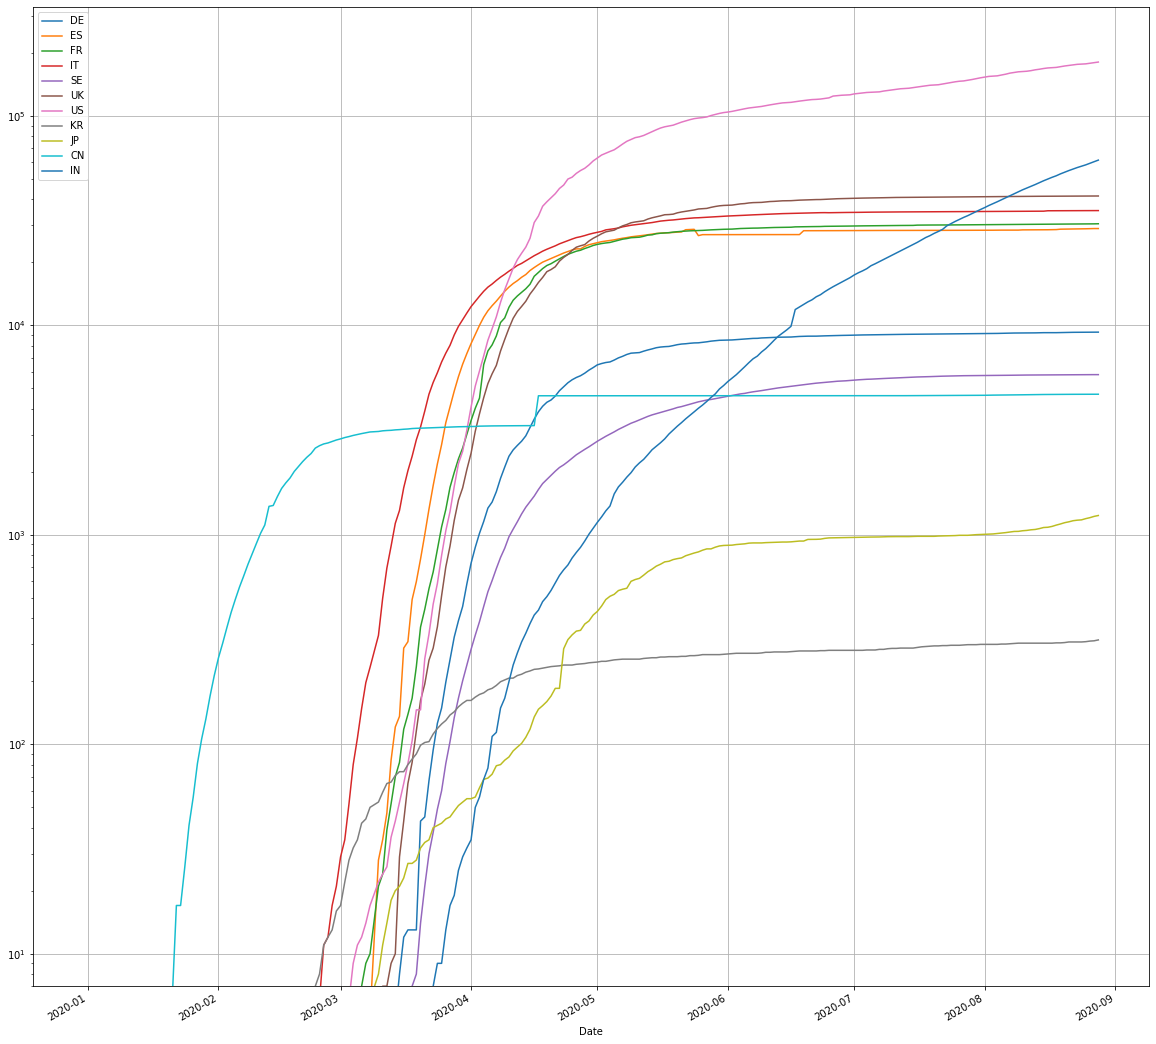

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-08-14,1452.0,5479.0,2669,522,444,1129,51094,103,1069,99,64553
12,2020-08-15,1339.0,0.0,2846,574,362,1440,64838,166,2064,70,65002
11,2020-08-16,718.0,0.0,3310,629,344,1077,48085,279,1137,65,63490
10,2020-08-17,481.0,16269.0,3015,477,226,1040,42104,197,238,96,57981
9,2020-08-18,1431.0,5114.0,493,320,63,713,35056,246,1006,66,55079
8,2020-08-19,769.0,6671.0,2238,401,174,1089,44091,297,1592,53,64531
7,2020-08-20,1707.0,7039.0,3776,642,314,812,47426,288,951,33,69652
6,2020-08-21,2327.0,8148.0,4771,840,351,1182,44005,324,1220,40,68898
5,2020-08-22,1134.0,0.0,4586,947,333,1033,49880,332,1012,49,69878
4,2020-08-23,782.0,0.0,3602,1071,298,1288,44378,397,1014,38,69239


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-08-14,222121.0,342380.0,208955.0,250743.0,80603.0,314867.0,5248121.0,14625.0,51480.0,89099.0,2461190.0
2020-08-15,223460.0,342380.0,211801.0,251317.0,80965.0,316307.0,5312959.0,14791.0,53544.0,89169.0,2526192.0
2020-08-16,224178.0,342380.0,215111.0,251946.0,81309.0,317384.0,5361044.0,15070.0,54681.0,89234.0,2589682.0
2020-08-17,224659.0,358649.0,218126.0,252423.0,81535.0,318424.0,5403148.0,15267.0,54919.0,89330.0,2647663.0
2020-08-18,226090.0,363763.0,218619.0,252743.0,81598.0,319137.0,5438204.0,15513.0,55925.0,89396.0,2702742.0
2020-08-19,226859.0,370434.0,220857.0,253144.0,81772.0,320226.0,5482295.0,15810.0,57517.0,89449.0,2767273.0
2020-08-20,228566.0,377473.0,224633.0,253786.0,82086.0,321038.0,5529721.0,16098.0,58468.0,89482.0,2836925.0
2020-08-21,230893.0,385621.0,229404.0,254626.0,82437.0,322220.0,5573726.0,16422.0,59688.0,89522.0,2905823.0
2020-08-22,232027.0,385621.0,233990.0,255573.0,82770.0,323253.0,5623606.0,16754.0,60700.0,89571.0,2975701.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-08-14,14.0,12.0,17,6,3,18,1083,0,10,3,1007
12,2020-08-15,6.0,0.0,18,3,5,11,1336,0,13,1,996
11,2020-08-16,0.0,0.0,3,158,0,3,1035,0,3,2,944
10,2020-08-17,1.0,29.0,1,4,1,5,571,0,10,0,941
9,2020-08-18,0.0,24.0,19,4,0,3,445,1,16,0,876
8,2020-08-19,11.0,127.0,22,5,1,12,1324,0,14,2,1092
7,2020-08-20,10.0,16.0,17,7,6,16,1356,1,16,1,977
6,2020-08-21,7.0,25.0,12,6,1,6,1078,2,11,3,983
5,2020-08-22,7.0,0.0,23,9,1,2,1151,0,14,2,945
4,2020-08-23,2.0,0.0,9,3,1,18,956,0,7,0,912


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-08-14,9225.0,28617.0,30379.0,35098.0,5803.0,41347.0,167106.0,304.0,1071.0,4677.0,48040.0
2020-08-15,9231.0,28617.0,30397.0,35101.0,5808.0,41358.0,168442.0,304.0,1084.0,4678.0,49036.0
2020-08-16,9231.0,28617.0,30400.0,35259.0,5808.0,41361.0,169477.0,304.0,1087.0,4680.0,49980.0
2020-08-17,9232.0,28646.0,30401.0,35263.0,5809.0,41366.0,170048.0,304.0,1097.0,4680.0,50921.0
2020-08-18,9232.0,28670.0,30420.0,35267.0,5809.0,41369.0,170493.0,305.0,1113.0,4680.0,51797.0
2020-08-19,9243.0,28797.0,30442.0,35272.0,5810.0,41381.0,171817.0,305.0,1127.0,4682.0,52889.0
2020-08-20,9253.0,28813.0,30459.0,35279.0,5816.0,41397.0,173173.0,306.0,1143.0,4683.0,53866.0
2020-08-21,9260.0,28838.0,30471.0,35285.0,5817.0,41403.0,174251.0,308.0,1154.0,4686.0,54849.0
2020-08-22,9267.0,28838.0,30494.0,35294.0,5818.0,41405.0,175402.0,308.0,1168.0,4688.0,55794.0
